<a href="https://colab.research.google.com/github/Estebanc0/ADA-Informes/blob/main/Informe11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis del problema
Entrada: un grafo 

Salida: el coste minimo del arbol de expasion

# Análisis del algoritmo:


1.   ordenar todos los bordes en orden no decreciente de sus pesos. Si no se nos permite cambiar el gráfico dado, podemos crear una copia del gráfico

2.  Se Crean subconjuntos V con elementos individuales

2.   Luego mientras El número de aristas sea igual a V-1 Elija el borde más pequeño e incremente el índice para la próxima iteración

1.   Aun dentro del while Si al incluir el borde seleccionado anteriormente no causa un ciclo, inclúyalo en el resultado e incremente el índice del resultado para el siguiente borde De lo contrario descartar el borde




In [22]:
class Graph:
 
    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = []
        # to store graph
 
    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 
    # A utility function to find set of an element i
    # (truly uses path compression technique)
    def find(self, parent, i):
        if parent[i] != i:
          # Reassignment of node's parent to root node as
          # path compression requires
            parent[i] = self.find(parent, parent[i])
        return parent[i]
 
    # A function that does union of two sets of x and y
    # (uses union by rank)
    def union(self, parent, rank, x, y):
        
        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[x] < rank[y]:
            parent[x] = y
        elif rank[x] > rank[y]:
            parent[y] = x
 
        # If ranks are same, then make one as root
        # and increment its rank by one
        else:
            parent[y] = x
            rank[x] += 1
 
    # The main function to construct MST using Kruskal's
        # algorithm
    def KruskalMST(self):
 
        result = []  # This will store the resultant MST
 
        # An index variable, used for sorted edges
        i = 0
 
        # An index variable, used for result[]
        e = 0
 
        # Step 1:  Sort all the edges in
        # non-decreasing order of their
        # weight.  If we are not allowed to change the
        # given graph, we can create a copy of graph
        self.graph = sorted(self.graph,
                            key=lambda item: item[2])
 
        parent = []
        rank = []
 
        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        # Number of edges to be taken is equal to V-1
        while e < self.V - 1:
 
            # Step 2: Pick the smallest edge and increment
            # the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            # If including this edge doesn't
            # cause cycle, then include it in result
            # and increment the index of result
            # for next edge
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
            # Else discard the edge
 
        minimumCost = 0
       # print("Edges in the constructed MST")
        for u, v, weight in result:
            minimumCost += weight
        #    print("%d -- %d == %d" % (u, v, weight))
        #print("Minimum Spanning Tree", minimumCost)
 
 
# Driver's code
if __name__ == '__main__':
    g = Graph(4)
    g.addEdge(0, 1, 10)
    g.addEdge(0, 2, 6)
    g.addEdge(0, 3, 5)
    g.addEdge(1, 3, 15)
    g.addEdge(2, 3, 4)
 
    # Function call
    g.KruskalMST()
 

# Tiempo de ejecución
O(ElogE) o O(ElogV), la clasificación de los bordes requiere tiempo O(ELogE) (donde E es el número de aristas). Después de ordenar, iteramos a través de todos los bordes y aplicamos el algoritmo de búsqueda de unión. Las operaciones de búsqueda y unión pueden tomar como máximo el tiempo O(LogV). Entonces, la complejidad general es O (ELogE + ELogV) tiempo. El valor de E puede ser como máximo O(V 2 ), por lo que O(LogV) es O(LogE) igual. Por lo tanto, la complejidad temporal general es O(ElogE) u O(ElogV)

# Correctitud
Teorema: el algoritmo de Kruskal encuentra un árbol de expansión mínimo.

Prueba: Sea G = (V, E) un gráfico conexo ponderado. Sea T el conjunto de aristas que crece en el algoritmo de Kruskal. La prueba es por inducción matemática sobre el número de aristas en T.

Mostramos que si T es prometedor en cualquier etapa del algoritmo, entonces sigue siendo prometedor cuando se le agrega una nueva ventaja en el algoritmo de Kruskal.
Cuando el algoritmo termina, sucederá que T da una solución al problema y por lo tanto un MST.
Base: T =  $ \phi$es prometedor ya que un gráfico conectado ponderado siempre tiene al menos un MST.
Paso de inducción: Sea T prometedor justo antes de agregar una nueva arista e = ( u , v ). Los bordes T dividen los nodos de G en uno o más componentes conectados. u y v estarán en dos componentes diferentes. Sea U el conjunto de nodos de la componente que incluye a u. Tenga en cuenta que

U es un subconjunto estricto de V
T es un conjunto prometedor de aristas tal que ninguna arista en T deja U (ya que una arista T tiene ambos extremos en U o no tiene ningún extremo en U)
e es una arista de menor costo que deja U (ya que el algoritmo de Kruskal, siendo codicioso, habría elegido e solo después de examinar aristas más cortas que e)
Las tres condiciones anteriores son precisamente como en el MST Lemma y, por lo tanto, podemos concluir que  T { e } también es prometedor. Cuando el algoritmo se detiene, T proporciona no solo un árbol de expansión, sino un árbol de expansión mínimo, ya que es prometedor. 

In [21]:

import random

# Crea un grafo de tipo array de arrays
# que contiene [i, j, peso]
# siendo i y j los nodos conectados
def graph_instance_creator(V):
  graph = Graph(V)
  for i in range(V):
    for j in range(i+1, V):
      graph.addEdge(i, j, random.randint(1, 500))
  
  return graph

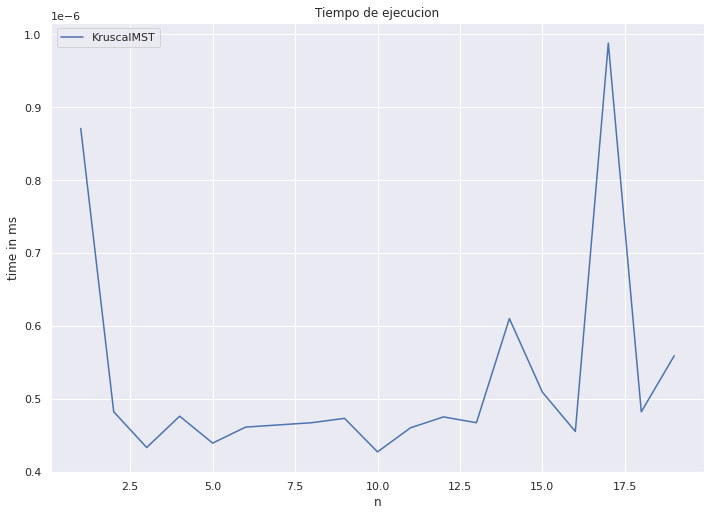

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat
import numpy as np

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Tiempo

x=[]; 
y=[]; 

for n in range(1,20):
  a= graph_instance_creator(n)

  t = repeat(setup="from __main__ import KruskalMST", stmt=f"{a.KruskalMST()}", repeat=1, number=10)
  
  x.append(n)
  y.append(t)


plt.plot(x,y)

plt.legend(["KruscalMST"])
plt.title("Tiempo de ejecucion")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

# Análisis experimento


Según lo indicado en el gráfico de su tiempo de ejecución experimental el algoritmo Presenta un mayor tiempo en ejecutarse al tener entre 1 y 2.5 elementos para dar la mayor bajada en toda su ejecución y luego comienza a aumentar el tiempo a medida que aumenta la cantidad de datos